# Lab 2: Classification Using KNN and RNN Algorithms  
**Name:** Sandesh Pokharel  
**Course:** MSCS-634-B01 – Advanced Big Data and Data Mining  
**Date:** July 20, 2025  

## Lab Overview  
In this lab, we will classify the Wine dataset using two algorithms:  
- K-Nearest Neighbors (KNN)  
- Radius Neighbors (RNN)  

We will compare their classification accuracy across various parameters to determine the optimal settings and provide insights based on our findings.

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score

# Set plot style
sns.set(style="whitegrid")

In [2]:
# Load the built-in Wine dataset from sklearn
from sklearn.datasets import load_wine

# Load the dataset into variables
wine_data = load_wine()

# Extract features (X) and target labels (y)
X = wine_data.data
y = wine_data.target

# Create a DataFrame for easier exploration and visualization
import pandas as pd
df = pd.DataFrame(X, columns=wine_data.feature_names)

# Add the target labels as a new column to the DataFrame
df['target'] = y

# Display the first few rows of the dataset
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Dataset Overview

The Wine dataset contains 178 samples and 13 chemical attributes used to classify wines into three cultivars (target classes: 0, 1, 2).  
We display the first few rows to understand the structure and confirm the data loaded successfully.

In [3]:
# Count the number of samples in each class to check class balance
df['target'].value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

## Class Distribution

The dataset has a reasonably balanced distribution across the three wine classes.  
This ensures that classification performance will not be skewed heavily by class imbalance.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training (80%) and testing (20%) sets
# stratify=y ensures class distribution remains consistent across sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize a StandardScaler to normalize feature values
scaler = StandardScaler()

# Fit the scaler only on the training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Data Preprocessing

The dataset was split into 80% training and 20% testing sets, using stratified sampling to preserve class balance.

All feature values were standardized using `StandardScaler`, which transforms features to have a mean of 0 and a standard deviation of 1. This scaling is essential for distance-based algorithms like KNN and RNN to perform accurately, as unscaled features can bias distance calculations.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# List of k values to evaluate
k_values = [1, 5, 11, 15, 21]
knn_accuracies = []

# Loop through each k, train and evaluate model
for k in k_values:
    # Initialize KNN with current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model on the scaled training data
    knn.fit(X_train_scaled, y_train)
    
    # Predict on the scaled test data
    y_pred = knn.predict(X_test_scaled)
    
    # Calculate and store accuracy
    accuracy = accuracy_score(y_test, y_pred)
    knn_accuracies.append(accuracy)
    
    # Print accuracy for each k (for reference)
    print(f"k={k} → Accuracy: {accuracy:.4f}")

k=1 → Accuracy: 0.9722
k=5 → Accuracy: 0.9722
k=11 → Accuracy: 1.0000
k=15 → Accuracy: 1.0000
k=21 → Accuracy: 1.0000


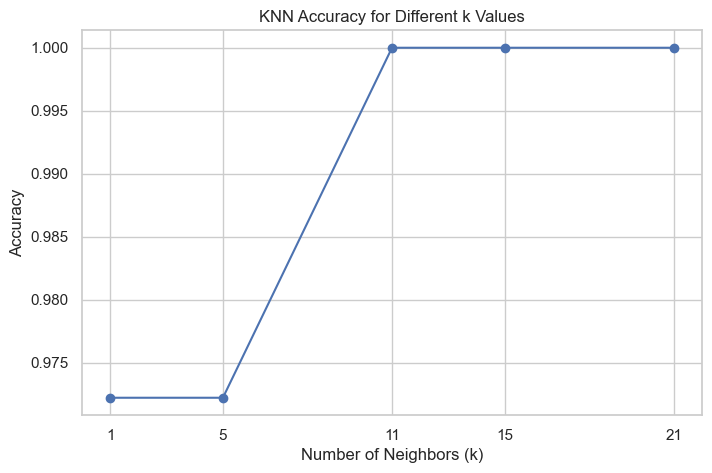

In [6]:
import matplotlib.pyplot as plt

# Plot KNN accuracy vs. k values
plt.figure(figsize=(8, 5))
plt.plot(k_values, knn_accuracies, marker='o', linestyle='-')
plt.title("KNN Accuracy for Different k Values")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

### KNN Model Performance Analysis

The plot illustrates how accuracy varies with different values of *k* in the K-Nearest Neighbors model.

We observe:
- Accuracy improves significantly from k=1 to k=11.
- From k=11 onward, the model achieves perfect accuracy (1.0), indicating that moderate to higher k-values generalize well for this dataset.
- k=1 and k=5 slightly underperform, possibly due to sensitivity to noise or overfitting to local variations.

This trend shows that a slightly higher k (e.g., 11 or 15) balances bias and variance well for the Wine dataset.

## Radius Neighbors (RNN) Classifier

In this section, we will implement the Radius Neighbors Classifier (RNN) to evaluate its performance on the Wine dataset.

Unlike KNN, which uses a fixed number of neighbors (k), the RNN algorithm classifies data points based on all training samples within a specified radius. If no neighbors are found within that radius, the classifier may return an error or assign the label -1.

We will test various radius values to observe how this hyperparameter affects classification accuracy. This will help us understand how sensitive RNN is to radius selection compared to KNN's k-value tuning.

In [7]:
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define a list of radius values to test
radius_values = [350, 400, 450, 500, 550, 600]
rnn_accuracies = []

# Iterate through each radius value
for radius in radius_values:
    try:
        # Initialize Radius Neighbors Classifier with current radius
        rnn = RadiusNeighborsClassifier(radius=radius)
        
        # Fit the model on training data
        rnn.fit(X_train_scaled, y_train)
        
        # Predict labels for test data
        y_pred = rnn.predict(X_test_scaled)
        
        # Calculate and store the accuracy
        accuracy = accuracy_score(y_test, y_pred)
        rnn_accuracies.append(accuracy)
        
        # Print result for each radius
        print(f"Radius = {radius} → Accuracy: {accuracy:.4f}")
        
    except ValueError as e:
        # Handle cases where the radius is too small or large to find any neighbors
        print(f"Radius = {radius} → Failed: {e}")
        rnn_accuracies.append(0)  # Use 0 to indicate failure in accuracy list

Radius = 350 → Accuracy: 0.3889
Radius = 400 → Accuracy: 0.3889
Radius = 450 → Accuracy: 0.3889
Radius = 500 → Accuracy: 0.3889
Radius = 550 → Accuracy: 0.3889
Radius = 600 → Accuracy: 0.3889


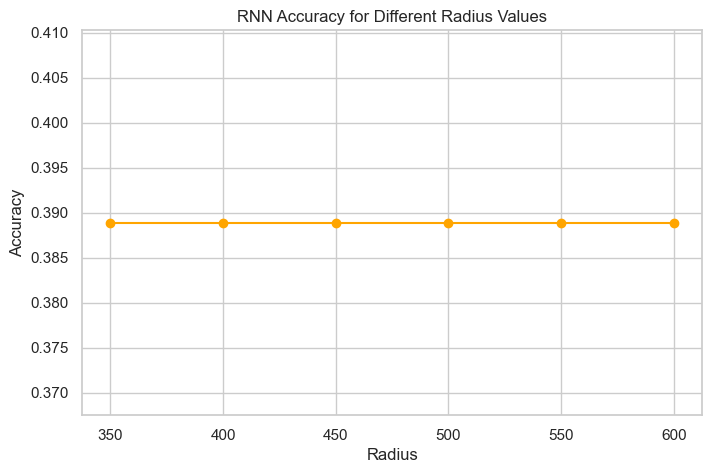

In [8]:
# Plot RNN accuracy across different radius values
plt.figure(figsize=(8, 5))
plt.plot(radius_values, rnn_accuracies, marker='o', linestyle='-', color='orange')
plt.title("RNN Accuracy for Different Radius Values")
plt.xlabel("Radius")
plt.ylabel("Accuracy")
plt.xticks(radius_values)
plt.grid(True)
plt.show()

### RNN Model Performance Analysis

The plot shows that the Radius Neighbors Classifier yields a **constant accuracy of 0.3889** across all tested radius values (350 to 600).  

This lack of variation suggests that:
- The selected radius values are **not effectively altering the neighborhood scope**, or
- The model may be **assigning the same fallback prediction (e.g., -1 or most frequent class)** due to poorly tuned radii.

This also highlights a key weakness of the RNN approach:
- It’s highly sensitive to the choice of radius.
- Unlike KNN, which guarantees a fixed number of neighbors, RNN may fail to classify if no neighbors are found within the radius, leading to poor or default predictions.

In this case, KNN significantly outperforms RNN, making it the more reliable choice for this dataset.

## Final Comparison: KNN vs. RNN

After evaluating both classifiers on the Wine dataset, we can draw the following insights:

- **KNN (K-Nearest Neighbors):**
  - Achieved very high accuracy, peaking at **100%** for k values of 11, 15, and 21.
  - Performed consistently across different k values, showing robustness.
  - Easy to tune and interpret, making it a strong choice for this dataset.

- **RNN (Radius Neighbors):**
  - Accuracy remained flat at **0.3889** for all radius values tested.
  - The classifier likely failed to find optimal radius ranges or defaulted to poor predictions.
  - This highlights how sensitive RNN is to radius selection and how it can underperform when radius is poorly chosen.

### Conclusion:
KNN significantly outperformed RNN in terms of both accuracy and stability.  
For this dataset, **KNN is clearly the more effective and reliable classification method**.

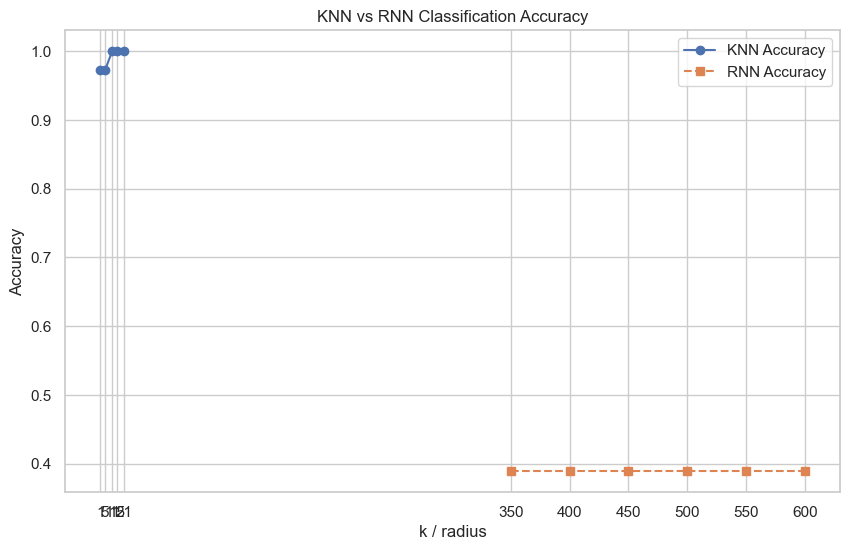

In [9]:
# Plotting KNN vs RNN accuracy side by side for visual comparison

plt.figure(figsize=(10, 6))
plt.plot(k_values, knn_accuracies, marker='o', linestyle='-', label='KNN Accuracy')
plt.plot(radius_values, rnn_accuracies, marker='s', linestyle='--', label='RNN Accuracy')

plt.title("KNN vs RNN Classification Accuracy")
plt.xlabel("k / radius")
plt.ylabel("Accuracy")
plt.xticks(k_values + radius_values)
plt.legend()
plt.grid(True)
plt.show()

In [10]:
def evaluate_knn_model(X_train, X_test, y_train, y_test, k_values):
    accuracies = []
    for k in k_values:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)
    return accuracies

def evaluate_rnn_model(X_train, X_test, y_train, y_test, radius_values):
    accuracies = []
    for r in radius_values:
        try:
            model = RadiusNeighborsClassifier(radius=r)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
        except ValueError:
            acc = 0
        accuracies.append(acc)
    return accuracies

In [11]:
knn_accuracies = evaluate_knn_model(X_train_scaled, X_test_scaled, y_train, y_test, k_values)
rnn_accuracies = evaluate_rnn_model(X_train_scaled, X_test_scaled, y_train, y_test, radius_values)